## Walmart Weekly Sales Prediction

#### Table of Content
1. Introduction
2. Loading The Data
3. Analyzing the data behavoiur with target variable
4. Feature Selection 
    - Implementing regression technique on feasible combinations
    - select the features based on analyzing techniques. 
5. Implementing different ML techniques
    - Data preparation for building model
    - Determined the polynomial degree through crossvalidation. 
    - Implementing - Polynomial regression
    - Implementing - KNN, Decision tree and Random Forest
6. Compare the performance and interpret the error
7. Improve the accuracy and test the model 
8. Conclusion

### 1. Introduction 
The business is facing challenges due to unexpected demand.In assessment1, analyze the past weekly sales of the different walmart stores to identify the sales trends and patterns, examine the correlation between sales and the economic factors like Consumer price Index, unemployment rate etc. This insights provides the valuable information about the over all sales and store sales performance.
The aim of this project is to build the predict model to predict the weekly sales accuractly.This model enables inventory management, allocate resource, plan marketing and decision making.

In [93]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualization libraries
import seaborn as sns 
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error,accuracy_score # metric library
from sklearn.model_selection import train_test_split # for spliting the data into train and test
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings('ignore')


### 2. Loading Data

In [94]:
# Read the data into dataframe
data = pd.read_excel('Walmart_project.xlsx')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [95]:
data.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [96]:
data.shape

(6435, 8)

- The data was loaded all rows with correct data types.

### 3. Analyzing the data behaivour with the target variable(Weekly_sales)

#### 3.a Histogram Analysis

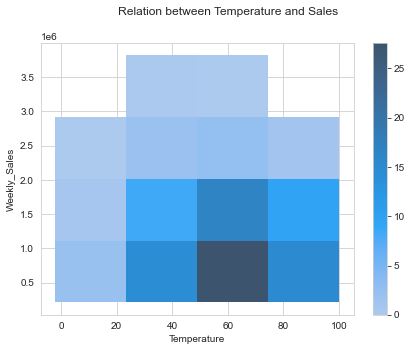

In [97]:
# plot the histrogram: Temperature Vs Weekly sales
plt.figure(figsize=(7,5))
sns.histplot(x=data['Temperature'],y=data['Weekly_Sales'],bins=4,cbar=True,stat='percent')
plt.suptitle('Relation between Temperature and Sales ')
plt.show()

- when the temperature is cool and very hot the sales were low compare to the warmer temperatures.

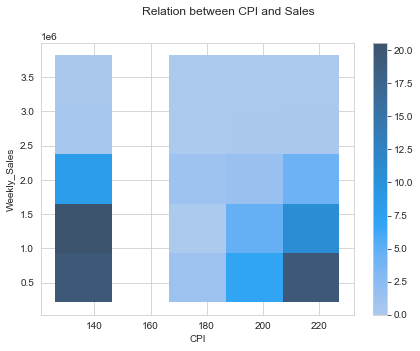

In [98]:
# plot the histrogram: CPI Vs Weekly Sales
plt.figure(figsize=(7,5))
sns.histplot(x=data['CPI'],y=data['Weekly_Sales'],bins=5,cbar=True,stat='percent')
plt.suptitle('Relation between CPI and Sales ')
plt.show()

- When CPI is low made good sales comparatively. 

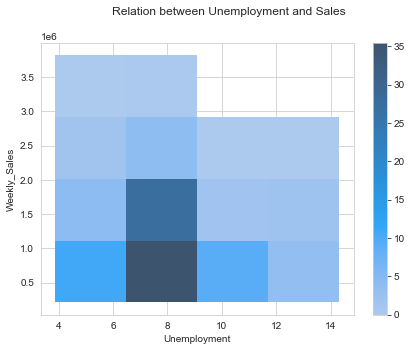

In [99]:
# plot the histrogram: Unemployment Vs Weekly sales
plt.figure(figsize=(7,5))
sns.histplot(x=data['Unemployment'],y=data['Weekly_Sales'],bins=4,cbar=True,stat='percent')
plt.suptitle('Relation between Unemployment and Sales ')
plt.show()

 - Greater and equal to 9% of unemployment rate the sales started to decrease.

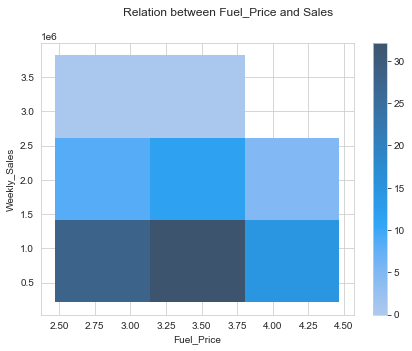

In [100]:
# plot the histrogram: Fuel Price Vs Weekly sales
plt.figure(figsize=(7,5))
sns.histplot(x=data['Fuel_Price'],y=data['Weekly_Sales'],bins=3,cbar=True,stat='percent')
plt.suptitle('Relation between Fuel_Price and Sales ')
plt.show()

- from the plot when the Fuel price is from (2.47 - 3.76) dollars,There is no impact on sales with increase in fuel price. 
- But When the fuel price is above the 3.76 dollars the sales were low.

#### 3.b) Correlation Analysis

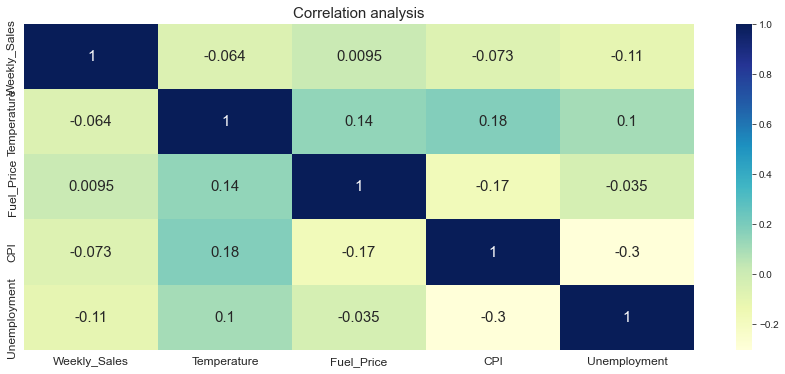

In [101]:
# Correlation Analysis 
plt.figure(figsize=(15,6))
sns.heatmap(data[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']].corr(),annot=True,cmap='YlGnBu',annot_kws={"size":15})
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Correlation analysis",size=15)
plt.show()

- CPI is having week negative correlation with weekly sales, implies sales decreases with increase in CPI. Similarly, Unemployment as well.
- CPI and Unemployment rate are negatively correlated. It is obvious that purchase power increase when decrease in unemployment rate.
- Fuel price is week positive correlation indicates increase in fuel price don't impact the sales.


- Used scipy.stats.pearsonr() method to find the Pearson correlation coefficient, which represents linear relationships between two variables.
It also gives the p-value for testing non-correlation.
    - performed statistical analysis between each factor and sales seperately.
 - Defined:
    - Null hypothesis : The factors has no relation with weekly sales
    - Alternative hypothesis : The factors has relation with weekly sales
    Comments from analysis:

In [102]:
# perform the statistical analysis for Temperature and Weekly sales

pearson_coef, p_value = stats.pearsonr(data['Temperature'], data['Weekly_Sales'])

print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.06381001317946959  with a P-value of P = 3.0076476258601934e-07


* The p-value < 0.01, so the relation is statistically significant, but there is a week linear relationship between the sales and tempearure. 

In [103]:
# perform the statistical analysis between CPI and Weekly sales

pearson_coef, p_value = stats.pearsonr(data['CPI'], data['Weekly_Sales'])

print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.07263416204017621  with a P-value of P = 5.438292612224682e-09


* Low p-value indicates statistically significant but very weak linear relationship. If coefficient = zero then considered to be no relationship

In [104]:
# perform the statistical analysis between unemployment and weekly_sales

pearson_coef, p_value = stats.pearsonr(data['Unemployment'], data['Weekly_Sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.10617608965795415  with a P-value of P = 1.3448365210351757e-17


* Low p-value indicates statistically significant but very weak linear relationship.The correlation is not equal to zero.

In [105]:
# perform the statistical analysis between fuel price and weekly sales

pearson_coef, p_value = stats.pearsonr(data['Fuel_Price'], data['Weekly_Sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.00946378631447513  with a P-value of P = 0.44782874895250047


* Accepting the null hypothesis as p-value >0.01. Indicates that fuel price and sales are not statistically significant. And the correlation is positive, so increase in fuel price do not impact the sales. 

#### 3.c) Boxplot analysis - to understand sales variability between the stores

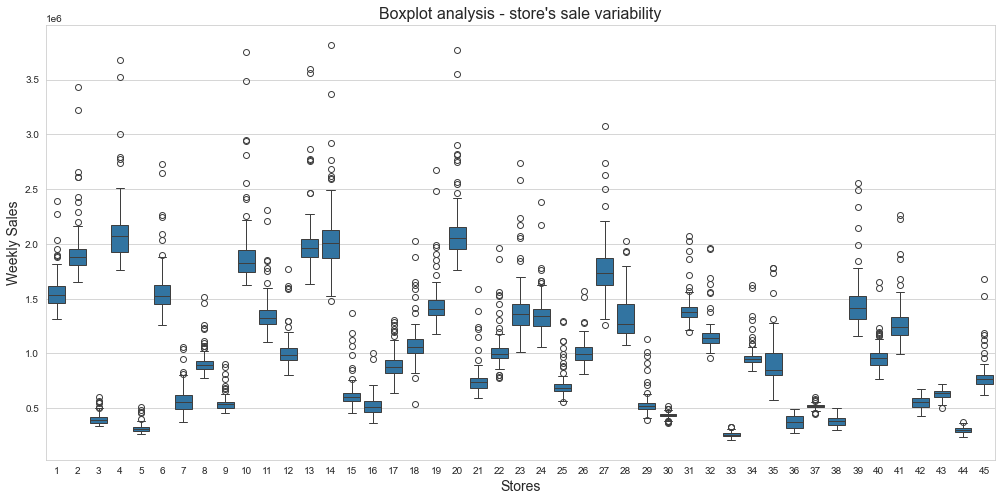

In [106]:
plt.figure(figsize=(17,8))
sns.boxplot(x=data['Store'],y=data['Weekly_Sales'])
plt.title('Boxplot analysis - store\'s sale variability',size=16)
plt.xlabel('Stores', size=14)
plt.ylabel('Weekly Sales',size=14)
plt.show()

- From the above visualization, each store is making different sales almost. They is a sales variability between the store located at different region.

- From the above analysis, Temperature, CPI, Unemployment and store (located in different region) are influencing the sale. Where as increase in fuel price not impacting the sales

### 4. Feature Selection

- Investigate whether these factors influence the sales together.

In [107]:
# store the Independent variables into X

X_original= data[['Temperature','Store','CPI','Unemployment','Fuel_Price']]

In [108]:
# store the dependent variable sales in y
y = data.iloc[:,2].values
y

array([1643690.9 , 1641957.44, 1611968.17, ...,  734464.36,  718125.53,
        760281.43])

In [109]:
import itertools # to get the combination of features
x_combination = []
stuff = ['Temperature','Store','CPI','Unemployment','Fuel_Price']
for L in range(len(stuff) + 1):
    for subset in itertools.combinations(stuff, L):
        x_combination.append(list(subset))
x_combination =x_combination[6:]
x_combination

[['Temperature', 'Store'],
 ['Temperature', 'CPI'],
 ['Temperature', 'Unemployment'],
 ['Temperature', 'Fuel_Price'],
 ['Store', 'CPI'],
 ['Store', 'Unemployment'],
 ['Store', 'Fuel_Price'],
 ['CPI', 'Unemployment'],
 ['CPI', 'Fuel_Price'],
 ['Unemployment', 'Fuel_Price'],
 ['Temperature', 'Store', 'CPI'],
 ['Temperature', 'Store', 'Unemployment'],
 ['Temperature', 'Store', 'Fuel_Price'],
 ['Temperature', 'CPI', 'Unemployment'],
 ['Temperature', 'CPI', 'Fuel_Price'],
 ['Temperature', 'Unemployment', 'Fuel_Price'],
 ['Store', 'CPI', 'Unemployment'],
 ['Store', 'CPI', 'Fuel_Price'],
 ['Store', 'Unemployment', 'Fuel_Price'],
 ['CPI', 'Unemployment', 'Fuel_Price'],
 ['Temperature', 'Store', 'CPI', 'Unemployment'],
 ['Temperature', 'Store', 'CPI', 'Fuel_Price'],
 ['Temperature', 'Store', 'Unemployment', 'Fuel_Price'],
 ['Temperature', 'CPI', 'Unemployment', 'Fuel_Price'],
 ['Store', 'CPI', 'Unemployment', 'Fuel_Price'],
 ['Temperature', 'Store', 'CPI', 'Unemployment', 'Fuel_Price']]

In [110]:
# implementing the linear regression on each feature combinations and select the best feature combination

Linear_regressor = LinearRegression()

FeatureCombination_score=[]
for i, iname in enumerate(x_combination):
        x = X_original[iname].values
        x_train,x_test,y_train,y_test= train_test_split(x,y,test_size= 0.2,random_state=0)
        Linear_regressor.fit(x_train,y_train)
        score = Linear_regressor.score(x_test,y_test)
        y_pred = Linear_regressor.predict(x_test)
        MSE = mean_squared_error(y_test,y_pred)
        numberOfFeatures = len(iname)
        numberOfobservations = len(x_test)
        AdjustedR2 = 1- (1-score)*numberOfobservations/(numberOfobservations-numberOfFeatures-1)
        FeatureCombination_score.append ({'Combination': iname ,'score' : round(score,4),'AdjustedR2' : round(AdjustedR2,4), 'MSE': round(MSE,4)})
#FeatureCombination_score
Feature_combination = pd.DataFrame(FeatureCombination_score)
# sorted the dataframe according to the score 
Feature_combination.sort_values(by='score', ascending= False)


,Combination,score,AdjustedR2,MSE
25,"[Temperature, Store, CPI, Unemployment, Fuel_P...",0.1666,0.1627,2.633941e+11
20,"[Temperature, Store, CPI, Unemployment]",0.1666,0.1633,2.634067e+11
24,"[Store, CPI, Unemployment, Fuel_Price]",0.1643,0.1611,2.641193e+11
16,"[Store, CPI, Unemployment]",0.1643,0.1617,2.641206e+11
21,"[Temperature, Store, CPI, Fuel_Price]",0.1583,0.1550,2.660227e+11
10,"[Temperature, Store, CPI]",0.1580,0.1554,2.661285e+11
4,"[Store, CPI]",0.1539,0.1519,2.674293e+11
17,"[Store, CPI, Fuel_Price]",0.1539,0.1513,2.674143e+11
22,"[Temperature, Store, Unemployment, Fuel_Price]",0.1466,0.1433,2.697188e+11
11,"[Temperature, Store, Unemployment]",0.1456,0.1429,2.700535e+11


Comments: 
-  Observed that the first two combinations has same score but AdjustedR2 reduced when the fuel price feature included in the first combination. Indicates that fuel price is not important feature.
- When we observed the feature combinations,where ever the store feature is present, the accuracy is better. Store is important feature.

- #### Therefore the selected features are Temperature, Store, CPI and Unemployment.Based on the correlation analysis, histogram analysis and selection wapper method

###  5. Implementing Different Machine Learning Techniques

#### 5.a) Data preparation for building model

In [111]:
# After feature selection independent variables
X = X_original[['Store','CPI','Unemployment']]
X.head(5)

,Store,CPI,Unemployment
0,1,211.096358,8.106
1,1,211.242170,8.106
2,1,211.289143,8.106
3,1,211.319643,8.106
4,1,211.350143,8.106


In [112]:
x = X.values

In [113]:
# output variable
y

array([1643690.9 , 1641957.44, 1611968.17, ...,  734464.36,  718125.53,
        760281.43])

In [114]:
# checking the rows and columns of the Input and output variable
x.shape, y.shape

((6435, 3), (6435,))

In [115]:
 
## fuction for Visualizing the best fit
def regression_plot(y_test,y_pred):
    sns.set_style("whitegrid")
    sns.regplot(x=y_test,y=y_pred,color='green',line_kws=dict(color="y"))
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Value')
    plt.title('Regression plot - Actual Vs predicted')
    plt.tight_layout()
    plt.show()

In [116]:
 #residual plot: check for the linearity, homoscedasticity(constant variance) and any clear patterns
def residual_plot(y_test,residue):
    sns.set_style("whitegrid")
    plt.scatter(y_test,residue)
    plt.xlabel('Fitted values/predicted')
    plt.ylabel('Residual')
    plt.title('Residual plot - Residuals Vs predicted values')
    plt.axhline(y=0, color='r',linestyle='--')
    plt.tight_layout()
    plt.show()

In [117]:
# To store the model and related metrics like accuracy,AdjustedR2,MSE, MAE, MAE% (later used to comare the results) 
model_metrics=[] 

# Function to fit the model,retrieve the metrics and visualize the regression and residual plots
def fit_model(model,x_train,y_train,x_test,y_test,model_name):
    
    # fit the model
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    residue = y_test - y_pred
    
    # Metrics calculation
    MSE = mean_squared_error(y_test,y_pred)
    Mean_aboluteError = mean_absolute_error(y_test,y_pred)
    mean_ablouteErrorPerc = mean_absolute_percentage_error(y_test,y_pred)
    test_accuracy = round(model.score(x_test,y_test)*100,2)
    train_accuracy = round(model.score(x_train,y_train)*100,2)
    numberOfFeatures = x_test.shape[1]
    numberOfobservations = len(x_test)
    AdjustedR2 = 1- (1-test_accuracy)*numberOfobservations/(numberOfobservations-numberOfFeatures-1)
    
    # print the merics
    print('Model Name : \t',model_name)
    print('Test Accuracy : \t', test_accuracy)
    print('Train Accuracy : \t', train_accuracy)
    print('AdjustedR2 \t',round(AdjustedR2,2))
    print('MSE : \t',round(MSE,2))
    print('Mean Absolute Error : \t',round(Mean_aboluteError,2))
    print('Mean Absolute Error% : \t', round(mean_ablouteErrorPerc*100,2))
    
    # Save the results in a list
    model_metrics.append({'Estimator': model_name,'test_accuracy': test_accuracy,\
                        'train_accuracy': train_accuracy, 'AdjustedR2':round(AdjustedR2,2),\
                         'MSE':round(MSE,2),'Mean Absolute Error':round(Mean_aboluteError,2),\
                        'Mean Absolute Error%': round(mean_ablouteErrorPerc*100,2)})
    
    regression_plot(y_test,y_pred) # calls the regression plot function
    residual_plot(y_test,residue) # calls the residue plot function
    

#### 5.b) After Spliting the data into train and test sets then standardize them

In [118]:
# spliting the data into train and test. Train data for training the model and test data for evaluating the model performance
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42) # took 30% as test set

In [119]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape # checking the shape after spliting

((4504, 3), (1931, 3), (4504,), (1931,))

In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [121]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

#### 5.c) Polynomial Regression

In [122]:
# transforming the Independent variable to polynomial : with degree [1 to 5] 
# and evaluate the accuracy at each degree

# declaring the model object
regressor_lr = LinearRegression()

from sklearn.preprocessing import PolynomialFeatures
degrees = np.arange(1,6)
#Xp = X.copy()
degree_accuracy = []
for i in degrees:
    poly = PolynomialFeatures(degree=i, include_bias=False)
    poly_X_train = poly.fit_transform(X_train)
    #Xp_train, Xp_test, yp_train, yp_test = train_test_split(poly_features, y, test_size=0.30, random_state=42)
    cross_score = cross_val_score(regressor_lr,poly_X_train, y_train, cv =5) # Implementing the cross validation on train set
    average_score = np.mean(cross_score)
    degree_accuracy.append({'Degree': i,'Average_Accuracy':round(average_score*100,3)})

degree_accuracy= pd.DataFrame(degree_accuracy) 
degree_accuracy

,Degree,Average_Accuracy
0,1,13.289
1,2,22.640
2,3,31.885
3,4,46.092
4,5,54.670


<Figure size 1080x360 with 0 Axes>

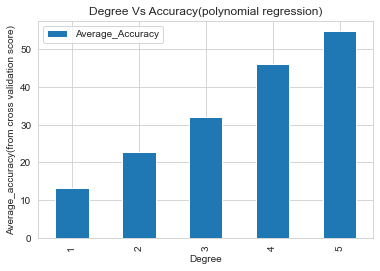

In [123]:
# visualize representaion : Does the accuracy increase with increase in degree 
plt.figure(figsize = (15,5))
degree_accuracy.plot(kind ='bar', x= 'Degree',y='Average_Accuracy')
plt.title('Degree Vs Accuracy(polynomial regression)')
plt.ylabel('Average_accuracy(from cross validation score)')
plt.show()

- The accuracy is increased upto degree 4 and dropped later. So implementing the polynomial regression with degree = 4

Model Name : 	 Polynomial Regression -degree4
Test Accuracy : 	 46.44
Train Accuracy : 	 46.95
AdjustedR2 	 47.28
MSE : 	 171238752613.2
Mean Absolute Error : 	 320253.96
Mean Absolute Error% : 	 40.78


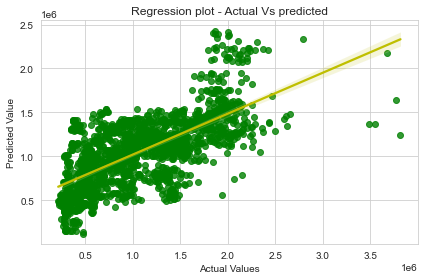

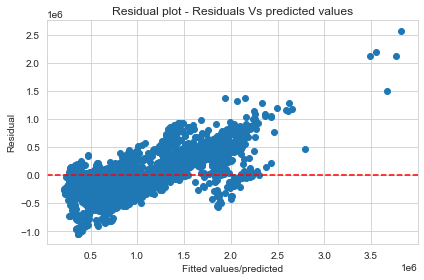

In [124]:
# implementing the ploynomial regression of degree 4
poly4 = PolynomialFeatures(degree=4, include_bias=False)
fit_model(regressor_lr,poly4.fit_transform(X_train),y_train,poly4.fit_transform(X_test),y_test, 'Polynomial Regression -degree4')


#### 5.d) KNN, SVR, decision tree and Random forest
- Implementing the GrissearchCV to select the best parameters

Model Name : 	 KNN,{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Test Accuracy : 	 92.65
Train Accuracy : 	 96.17
AdjustedR2 	 92.84
MSE : 	 23495645326.91
Mean Absolute Error : 	 80476.35
Mean Absolute Error% : 	 7.09


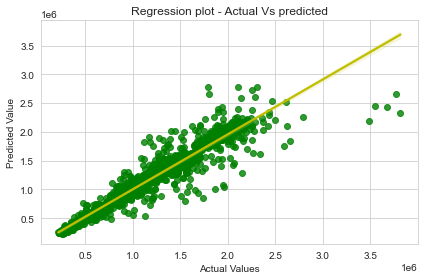

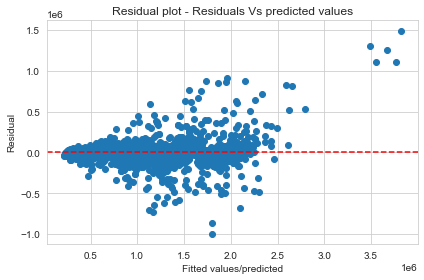

Model Name : 	 Decision Tree,{'max_depth': None}
Test Accuracy : 	 89.46
Train Accuracy : 	 100.0
AdjustedR2 	 89.64
MSE : 	 33701367489.49
Mean Absolute Error : 	 94478.32
Mean Absolute Error% : 	 8.48


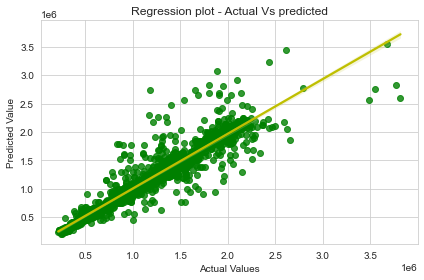

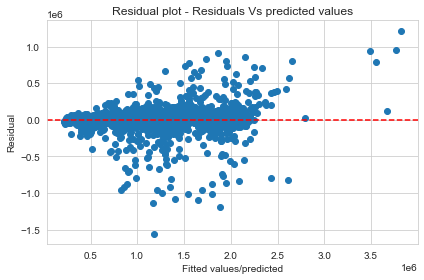

Model Name : 	 Random Forest,{'max_depth': None, 'n_estimators': 100}
Test Accuracy : 	 92.71
Train Accuracy : 	 98.98
AdjustedR2 	 92.9
MSE : 	 23294379067.57
Mean Absolute Error : 	 81515.21
Mean Absolute Error% : 	 7.27


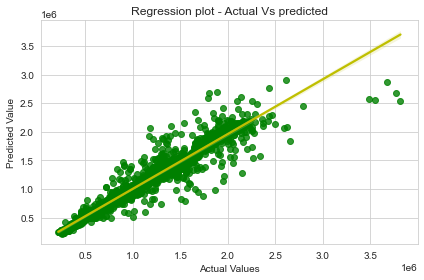

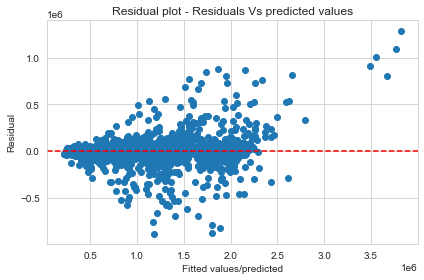

[{'Estimator': 'KNN',
  'Parameters': {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}},
 {'Estimator': 'Decision Tree', 'Parameters': {'max_depth': None}},
 {'Estimator': 'Random Forest',
  'Parameters': {'max_depth': None, 'n_estimators': 100}}]

In [125]:
# declaring the parameter combination for each ML techniques
model_params ={
    'KNN' :
    {
        'model' : KNeighborsRegressor(),
        'params_grid':{
            'n_neighbors' : [3,5,7,9,10], 
            'p' : [1,2],
            'weights' : ['uniform','distance']
        }
    },
    'Decision Tree' :
    {
        'model' : DecisionTreeRegressor(),
        'params_grid' : {
            'max_depth' :[None,5,10,20]
        }
    },
    'Random Forest' :
    {
       'model' : RandomForestRegressor(),
       'params_grid' : {
           'n_estimators' : [100,120,150,200],
           'max_depth' : [None,5, 10,20]
       }
    }
    
}

best_models=[] # To store the model with best parameters

for model_name,model_val in model_params.items():
    grid_search = GridSearchCV(estimator=model_val['model'],param_grid=model_val['params_grid'],cv=5,scoring='accuracy')
    grid_search.fit(X_train,y_train)
    best_model = grid_search.best_estimator_
    best_param = grid_search.best_params_
    best_models.append({'Estimator': model_name, 'Parameters':best_param})
    #best_model.fit(X_train,y_train)
    #y_pred_grid = best_model.predict(X_test)
    #mse = mean_squared_error(y_test,y_pred_grid)
    #Mean_aboluteError = mean_absolute_error(y_test,y_pred_grid)
    #mean_ablouteErrorPerc = mean_absolute_percentage_error(y_test,y_pred_grid)
    #train_accuracy=best_model.score(X_train,y_train)
    #test_accuracy =r2_score(y_test,y_pred_grid)
    #numberOfFeatures = X_test.shape[1]
    #numberOfobservations = len(X_test)
    #AdjustedR2 = 1- (1-test_accuracy)*numberOfobservations/(numberOfobservations-numberOfFeatures-1)
    #model_metrics.append({'Estimator': model_name,'test_accuracy': round(test_accuracy*100,2),\
                        # 'train_accuracy': round(train_accuracy*100,2), 'AdjustedR2':round(AdjustedR2*100,2),\
                        #  'MSE':round(mse,2),'Mean Absolute Error':round(Mean_aboluteError,2),\
                        # 'Mean Absolute Error%': round(mean_ablouteErrorPerc*100,2)})
    fit_model(best_model,X_train,y_train,X_test,y_test,f'{model_name},{best_param}')
    
best_models 

In [126]:
model_metrics

[{'Estimator': 'Polynomial Regression -degree4',
  'test_accuracy': 46.44,
  'train_accuracy': 46.95,
  'AdjustedR2': 47.28,
  'MSE': 171238752613.2,
  'Mean Absolute Error': 320253.96,
  'Mean Absolute Error%': 40.78},
 {'Estimator': "KNN,{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}",
  'test_accuracy': 92.65,
  'train_accuracy': 96.17,
  'AdjustedR2': 92.84,
  'MSE': 23495645326.91,
  'Mean Absolute Error': 80476.35,
  'Mean Absolute Error%': 7.09},
 {'Estimator': "Decision Tree,{'max_depth': None}",
  'test_accuracy': 89.46,
  'train_accuracy': 100.0,
  'AdjustedR2': 89.64,
  'MSE': 33701367489.49,
  'Mean Absolute Error': 94478.32,
  'Mean Absolute Error%': 8.48},
 {'Estimator': "Random Forest,{'max_depth': None, 'n_estimators': 100}",
  'test_accuracy': 92.71,
  'train_accuracy': 98.98,
  'AdjustedR2': 92.9,
  'MSE': 23294379067.57,
  'Mean Absolute Error': 81515.21,
  'Mean Absolute Error%': 7.27}]

### 6) Compare the performance and interpret the error

In [127]:
models_performance= pd.DataFrame(data=model_metrics).sort_values(by = 'test_accuracy',ascending= False)
models_performance

,Estimator,test_accuracy,train_accuracy,AdjustedR2,MSE,Mean Absolute Error,Mean Absolute Error%
3,"Random Forest,{'max_depth': None, 'n_estimator...",92.71,98.98,92.90,2.329438e+10,81515.21,7.27
1,"KNN,{'n_neighbors': 3, 'p': 1, 'weights': 'uni...",92.65,96.17,92.84,2.349565e+10,80476.35,7.09
2,"Decision Tree,{'max_depth': None}",89.46,100.00,89.64,3.370137e+10,94478.32,8.48
0,Polynomial Regression -degree4,46.44,46.95,47.28,1.712388e+11,320253.96,40.78


- Random forest's - mean absolute error is very less and Accuracies also higher than other model.Observed that the variance between the test and train accuracies is also less. From this there is no possiblity of overfit or underfit issue.
- Random forest is vertaile and generalize the model well on nonlinear data. 
- Ramdom forest model can able to predict the weekly sales with 7% error.
- From above random forest's residual plot, identified the error is due to the outliers. But the outliers are from the real observation so didn’t drop them. To improve the predictive power, we can’t use the method of dropping the less importance feature. As we selected the best features combination by implementing the multiple linear regression in section3. so can try to implement different potential algorithm to capture the data.

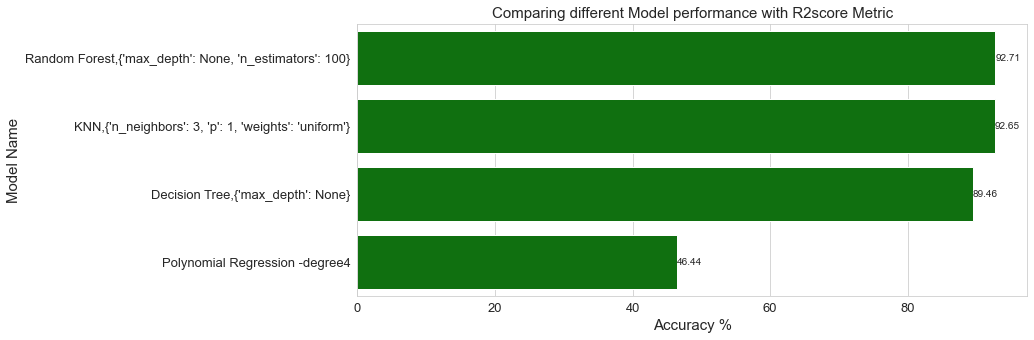

In [128]:
## comparing different models R2square.
fig,ax =plt.subplots(figsize=(12, 5))
sns.barplot(x='test_accuracy',y='Estimator',data=models_performance,color='green')
plt.xlabel('Accuracy %',size=15)
plt.ylabel('Model Name',size=15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Comparing different Model performance with R2score Metric', size=15)
ax.bar_label(ax.containers[0])
plt.show()

### 7. Improving Accuracy

#### 7a) Implementing the boosting technique for model improvement

In [129]:
from xgboost import XGBRegressor
n_estimator = [100,150,200]
learning_rate =[i for i in np.arange(0.1,1,0.1)]
accuracy = []
for estimator in n_estimator :
    for i in learning_rate:
        xg = XGBRegressor(n_estimators=estimator,learning_rate=i,objective='reg:squarederror')
        xg.fit(X_train,y_train)
        Accuracy = xg.score(X_test,y_test)
        accuracy.append({'estimator':estimator,'learning_rate':i,'Accuracy':Accuracy})
pd.DataFrame(accuracy).sort_values('Accuracy',ascending= False)

,estimator,learning_rate,Accuracy
21,200,0.4,0.951947
12,150,0.4,0.951798
3,100,0.4,0.951483
19,200,0.2,0.950335
22,200,0.5,0.949702
13,150,0.5,0.949664
5,100,0.6,0.949610
14,150,0.6,0.949391
23,200,0.6,0.949309
20,200,0.3,0.949113


Model Name : 	 Xgboost(nest200,learning%=0.2)
Test Accuracy : 	 95.03
Train Accuracy : 	 99.16
AdjustedR2 	 95.23
MSE : 	 15878970727.91
Mean Absolute Error : 	 67110.06
Mean Absolute Error% : 	 6.18


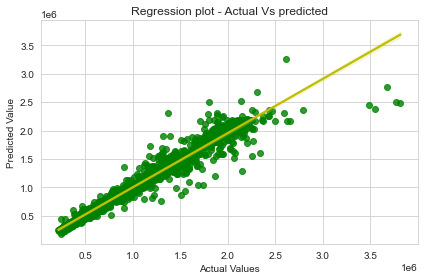

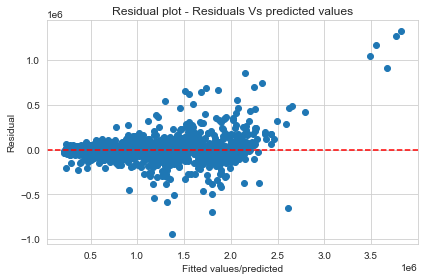

In [130]:
Xgmodel = XGBRegressor(n_estimators=200,learning_rate=0.2,objective='reg:squarederror')
fit_model(Xgmodel,X_train,y_train,X_test,y_test,'Xgboost(nest200,learning%=0.2)')

- The accuracy is slightly improved to 94.82% from 93.18% by XGBoost algorithm implementation with 200 trees and 0.2 learning rate. The MAE% is also reduced to 6.68% from 7%. 
- The regression line is the straight line that best fits the data points. It represents the estimated relationship between the two variables.The closer the points are to the line, and the better the fit.  
- And the residuals are much closer to zero indicates that there is a less difference between the actual and predicted sales value. but still, we can observe the outliers in the residual plot. 

#### Test the model by passing the independent variable values 
 - for example passed the first row in the dataset

In [131]:
# passed the independent varialbes to test the model
y_xgpred = Xgmodel.predict(scaler.transform([[1,211.096358,8.106]]))
y_xgpred # predicted value 

array([1597081.4], dtype=float32)

In [132]:
y[:1] # actual value 

array([1643690.9])

- Observed less diffrence between the actual and true value.With this test we can conclude that the model performes well.

### 8. Conclusion

In accordance with the project specifications for developing a predictive model, it has been established that Consumer Price Index (CPI), store, unemployment, and temperature variables influence sales. This determination was made through the analysis of histograms, box plots, correlation assessments, and linear regression models applied to all feasible feature combinations. 
Then standardized the data and implemented various regression models using the optimal parameters identified through GridsearchCV. After comparing all the models, it was observed that random forest model demonstrated the best fit with a MAE% of 7% and 93% of variability was explained by selected independent features. In an effort to enhance the accuracy XGBoost algorithm was implemented with the tuning of learning rate and n_estimators to achieve optimal convergence. Consequently, the performance increased from 93.18% to 94.82%. 

From all these analysis,I have answered the business question of developing the predictive sales model.This refined model servers as an effective tool for the business to improve inventory management, resource allocation, financial planning and strategic decision-making.


In [133]:
X.iloc[0].values.reshape(1,-1)

array([[  1.       , 211.0963582,   8.106    ]])

In [134]:
# pickling the model file for deploymnet
import pickle
pickle.dump(Xgmodel,open('salesXgpred.pkl','wb'))
pickle_model= pickle.load(open('salesXgpred.pkl','rb'))



In [135]:
#ypred = pickle_model.predict(scaler.transform(X.iloc[0].values.reshape(1,-1)))

In [136]:
#ypred

Model Name : 	 RandomFmodel
Test Accuracy : 	 92.79
Train Accuracy : 	 98.97
AdjustedR2 	 92.98
MSE : 	 23041285029.42
Mean Absolute Error : 	 81145.34
Mean Absolute Error% : 	 7.24


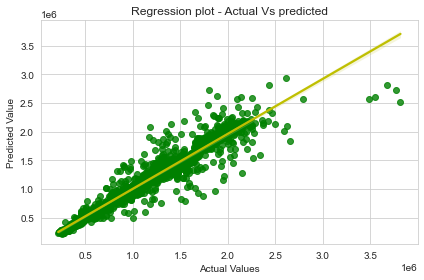

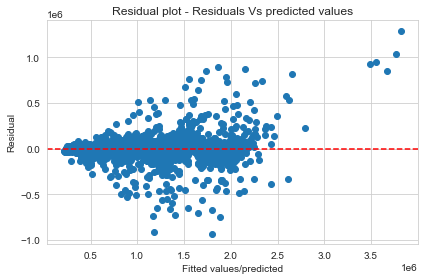

In [137]:
from sklearn.ensemble import RandomForestRegressor
RandomFmodel = RandomForestRegressor()
fit_model(RandomFmodel,X_train,y_train,X_test,y_test,'RandomFmodel')
pickle.dump(RandomFmodel,open('salesFFpred.pkl','wb'))